In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random 
from datetime import datetime
import numpy as np

mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Dense(1, dtype='float64')
    ])

In [2]:
model = create_model()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('test_accuracy')
batchsize = 32
train_data = np.array([(x_train[i], y_train[i]) for i in range(len(x_train))])

def gradient(data):
    x = np.expand_dims(data[0], axis=0)
    y = np.expand_dims(data[1], axis=0)
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = loss_object(y, predictions)

    grads = tape.gradient(loss, model.trainable_variables)
    return grads

def get_weights():
    return model.get_weights()

def update_weights(weights):
    return model.set_weights(weights)

def learning_rate_function(step):
    if step//100 > 10:
        return 0.052
    return 0.1 + (0.052-0.1)*(step//100-1)/9

acc = []
def test_function():
    predictions = model(x_test)
    loss = loss_object(y_test, predictions)

    test_loss.reset_states()
    test_accuracy.reset_states()
    test_loss(loss)
    test_accuracy(y_test, predictions)
    acc.append(test_accuracy.result())
    print(float(test_accuracy.result()))

ipykernel_launcher:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
from private_machine_learning import *

tracker = MomentPrivacyBudgetTracker(PrivacyBudget(100,100))
print(tracker.consumed_privacy_budget)

result = private_SGD(gradient_function = gradient, 
                    get_weights_function = get_weights, 
                    update_weights_function = update_weights, 
                    learning_rate_function = learning_rate_function, 
                    group_size = 600, 
                    gradient_norm_bound = 4, 
                    number_of_steps = 60000//600*3, 
                    train_data = train_data,
                    sigma = 8,
                    moment_privacy_budget_tracker = tracker,
                    test_interval = 10,
                    test_function = test_function
                    )

print(tracker.consumed_privacy_budget)

In [4]:
#Previous result to skip the execution time of the cell above.

acc=[
    0.09830000251531601,
    0.3666999936103821,
    0.4964999854564667,
    0.590399980545044,
    0.626800000667572,
    0.6571000218391418,
    0.6793000102043152,
    0.7020000219345093,
    0.7282999753952026,
    0.7440000176429749,
    0.7547000050544739,
    0.7695000171661377,
    0.7803999781608582,
    0.7936999797821045,
    0.7990000247955322,
    0.8086000084877014,
    0.8131999969482422,
    0.819599986076355,
    0.8238000273704529,
    0.8267999887466431,
    0.8313000202178955,
    0.8341000080108643,
    0.8363999724388123,
    0.838699996471405,
    0.8432000279426575,
    0.8464999794960022,
    0.8486999869346619,
    0.8497999906539917,
    0.8539000153541565,
    0.8560000061988831,
]

In [5]:
from calculate_moment import get_privacy_spent, compute_log_moment

def calculate_privacy(q, sigma, steps, moment_order = 32, epsilon = None, delta = None):
    log_moments = [(i, compute_log_moment(q, sigma, steps, i)) for i in range(1, moment_order + 1)]
    privacy = get_privacy_spent(log_moments, epsilon, delta)
    return PrivacyBudget(privacy[0], privacy[1])

eps = []
for i in range(0,300,10):
    eps.append(calculate_privacy(600/60000, sigma=8, steps=i, moment_order = 32 , delta = 1e-5).epsilon)

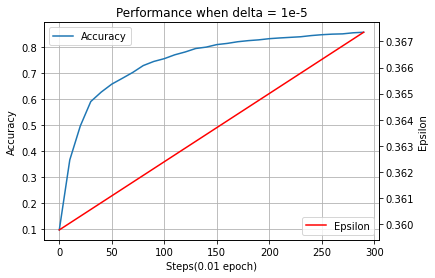

In [6]:
x = range(0,300,10)
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, acc, '-', label = 'Accuracy')
ax2 = ax.twinx()
ax2.plot(x, eps, '-r', label = 'Epsilon')
ax.legend(loc=0)
ax2.legend(loc=4)
ax.grid()
ax.set_xlabel("Steps(0.01 epoch)")
ax.set_ylabel(r"Accuracy")
ax2.set_ylabel(r"Epsilon")
# ax2.set_ylim(0, 35)
# ax.set_ylim(-20,100)
plt.title("Performance when delta = 1e-5")
plt.show()